In [26]:
from selenium import webdriver 
from selenium.webdriver.common.by import By

# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# Load the webpage
url = "https://www.eufic.org/en/explore-seasonal-fruit-and-vegetables-in-europe"
driver.get(url)

# Function to scrape data (for fruits or vegetables)
def scrape_data(tab_id, div_id):
    tab = driver.find_element(By.ID, tab_id)
    tab.click()
    
    div = driver.find_element(By.ID, div_id)
    fvgrid_div = div.find_element(By.CLASS_NAME, "fvgrid")
    
    items = fvgrid_div.find_elements(By.TAG_NAME, "div")
    
    data = []
    
    for item in items:
        class_attribute_value = item.get_attribute("class")
        name = item.find_element(By.TAG_NAME, "strong").text.strip()
        
        months_and_countries = class_attribute_value.split(" ")[1:]
        for month_and_country in months_and_countries:
            month_country_split = month_and_country.split("-")
            month = month_country_split[0]
            country = month_country_split[1] if len(month_country_split) > 1 else None
            
            if country is not None:
                info = {
                    "name": name,
                    "month": month,
                    "country": country
                }
                
                data.append(info)
    
    return data

# Function to display data
def display_data(data, data_type):
    print(f"{data_type.capitalize()} Data:")
    for item in data:
        print(f"{data_type.capitalize()}: {item['name']}, Month: {item['month']}, Country: {item['country']}")

# Scrape fruits data
fruits_data = scrape_data("Fruit-tab", "Fruit")

# Scrape vegetables data
vegetables_data = scrape_data("Vegetable-tab", "Vegetable")

# Close the browser
driver.quit()

# Display the scraped fruits data
display_data(fruits_data, "fruits")

# Display the scraped vegetables data
display_data(vegetables_data, "vegetables")


Fruits Data:
Fruits: apple, Month: august, Country: denmark
Fruits: apple, Month: september, Country: denmark
Fruits: apple, Month: october, Country: denmark
Fruits: apple, Month: november, Country: denmark
Fruits: apple, Month: december, Country: denmark
Fruits: apple, Month: january, Country: denmark
Fruits: apple, Month: february, Country: denmark
Fruits: apple, Month: march, Country: denmark
Fruits: apple, Month: april, Country: denmark
Fruits: apple, Month: august, Country: italy
Fruits: apple, Month: september, Country: italy
Fruits: apple, Month: october, Country: italy
Fruits: apple, Month: november, Country: italy
Fruits: apple, Month: december, Country: italy
Fruits: apple, Month: january, Country: italy
Fruits: apple, Month: september, Country: unitedkingdom
Fruits: apple, Month: october, Country: unitedkingdom
Fruits: apple, Month: november, Country: unitedkingdom
Fruits: apple, Month: december, Country: unitedkingdom
Fruits: apple, Month: january, Country: unitedkingdom
Fr

Initialization and Webpage Loading:

The webdriver.Chrome() initializes the Chrome web driver.
The URL of the webpage is loaded using driver.get(url).

Data Scraping Function:

scrape_data function takes two parameters: tab_id and div_id.
It clicks on the specified tab and retrieves data from the specified division.
The function iterates through the items found within the fvgrid division, extracts the class attribute, and splits it to get the month and country information.
If the country information is available, it is appended to the data list.

Data Display Function:

display_data function takes the scraped data and a data type (fruits or vegetables) as parameters.
It prints the name, month, and country of each item in the data list.

Scraping and Displaying Data:

Fruits and vegetables data are scraped using the scrape_data function.
The web driver is closed using driver.quit().
The scraped data for fruits and vegetables are printed using the display_data function

Filtering None Values and Saving to CSV

This part is responsible for filtering out items with None values for the country and saving the cleaned data to CSV files.

In [27]:
import csv

# Function to save data to CSV
def save_data_to_csv(data, file_path):
    with open(file_path, mode="w", newline="", encoding="utf-8") as csvfile:
        fieldnames = ["name", "month", "country"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        # Write the header
        writer.writeheader()
        
        # Write the filtered data
        for item in data:
            if item["country"] is not None:
                writer.writerow(item)

# File paths for the CSV files
fruits_csv_file_path = "fruits_data.csv"
vegetables_csv_file_path = "vegetables_data.csv"

# Save the scraped fruits data to a CSV file
save_data_to_csv(fruits_data, fruits_csv_file_path)
print(f"Fruits data has been written to {fruits_csv_file_path}")

# Save the scraped vegetables data to a CSV file
save_data_to_csv(vegetables_data, vegetables_csv_file_path)
print(f"Vegetables data has been written to {vegetables_csv_file_path}")


Fruits data has been written to fruits_data.csv
Vegetables data has been written to vegetables_data.csv


CSV Writing Function:

Save_data_to_csv function takes the data list and the file path as parameters.
It opens the specified CSV file in write mode.
It defines the fieldnames for the CSV (name, month, country) and initializes a csv.DictWriter.
It writes the header and then iterates through the data list.
Only items with non-None country values are written to the CSV file.

Saving Data to CSV:

The file paths for the fruits and vegetables CSV files are defined.
The save_data_to_csv function is called with the scraped fruits and vegetables data and their respective file paths.
A confirmation message is printed after successfully writing the data to each CSV file.

Data Identification and Availability

Through web scraping, we have identified the following data required and available:

Names of fruits and vegetables
Months of availability
Countries of availability

Data Validation

Source: The data originates from the EUFIC (European Food Information Council) website for providing food-related information.

In [28]:
#Exploratory Data Analysis (EDA)

# Load data
fruits_df = pd.read_csv('fruits_data.csv')
vegetables_df = pd.read_csv('vegetables_data.csv')

# Data cleaning functions
def clean_data(df):
    # Fill missing values in 'country' column with 'Unknown'
    df['country'].fillna('Unknown', inplace=True)
    
    # Convert all strings to lowercase
    df['name'] = df['name'].str.lower()
    df['month'] = df['month'].str.lower()
    df['country'] = df['country'].str.lower()
    
    return df

# Clean fruits and vegetables data
fruits_df = clean_data(fruits_df)
vegetables_df = clean_data(vegetables_df)

# Display cleaned dataframes
print("Cleaned Fruits Data:")
display(fruits_df.head())

print("\nCleaned Vegetables Data:")
display(vegetables_df.head())


Cleaned Fruits Data:


,name,month,country
0,apple,august,denmark
1,apple,september,denmark
2,apple,october,denmark
3,apple,november,denmark
4,apple,december,denmark



Cleaned Vegetables Data:


,name,month,country
0,artichoke,january,italy
1,artichoke,february,italy
2,artichoke,march,italy
3,artichoke,april,italy
4,artichoke,may,italy


In [29]:
# Data Inspection

# Check for missing values
missing_fruits = fruits_df.isnull().sum()
missing_vegetables = vegetables_df.isnull().sum()

# Summary statistics
stats_fruits = fruits_df.describe()
stats_vegetables = vegetables_df.describe()

# Unique values
unique_fruits_count = fruits_df['name'].nunique()
unique_vegetables_count = vegetables_df['name'].nunique()

unique_months_fruits = fruits_df['month'].unique()
unique_months_vegetables = vegetables_df['month'].unique()

unique_countries_fruits = fruits_df['country'].unique()
unique_countries_vegetables = vegetables_df['country'].unique()

# Resulst
print("Missing values in fruits dataset:")
print(missing_fruits)
print("\nMissing values in vegetables dataset:")
print(missing_vegetables)

print("\nSummary statistics for fruits dataset:")
print(stats_fruits)
print("\nSummary statistics for vegetables dataset:")
print(stats_vegetables)

print("\nNumber of unique fruit names:", unique_fruits_count)
print("Number of unique vegetable names:", unique_vegetables_count)

print("\nUnique months in fruits dataset:", unique_months_fruits)
print("Unique months in vegetables dataset:", unique_months_vegetables)

print("\nUnique countries in fruits dataset:", unique_countries_fruits)
print("Unique countries in vegetables dataset:", unique_countries_vegetables)

Missing values in fruits dataset:
name       0
month      0
country    0
dtype: int64

Missing values in vegetables dataset:
name       0
month      0
country    0
dtype: int64

Summary statistics for fruits dataset:
         name   month country
count    2083    2083    2083
unique     76      12      29
top     apple  august  turkey
freq      160     318     233

Summary statistics for vegetables dataset:
          name    month country
count     7309     7309    7309
unique     172       12      29
top     carrot  october  turkey
freq       224      801     617

Number of unique fruit names: 76
Number of unique vegetable names: 172

Unique months in fruits dataset: ['august' 'september' 'october' 'november' 'december' 'january' 'february'
 'march' 'april' 'july' 'june' 'may']
Unique months in vegetables dataset: ['january' 'february' 'march' 'april' 'may' 'june' 'july' 'august'
 'september' 'october' 'november' 'december']

Unique countries in fruits dataset: ['denmark' 'italy' 'uni

Here are some observations about the fruits and vegetables data:
Missing Values:

Both the fruits and vegetables datasets have no missing values (0 in all columns).

Summary Statistics:

Fruits Data:
Total entries: 2083
Unique names: 76
Most common month: August
Most common country: Turkey

Vegetables Data:
Total entries: 7309
Unique names: 172
Most common month: October
Most common country: Turkey

Unique Values:

Fruits:
Number of unique fruits: 76
Unique months: ['august', 'september', 'october', 'november', 'december', 'january', 'february', 'march', 'april', 'july', 'june', 'may']
Unique countries: ['turkey', 'spain', 'italy', 'greece', 'portugal', 'unitedkingdom', 'belgium', 'norway', 'sweden', 'france', 'luxembourg', 'malta', 'poland', 'lithuania', 'cyprus', 'switzerland', 'denmark', 'ireland', 'netherlands', 'czechrepublic', 'austria', 'hungary', 'germany', 'slovenia', 'croatia', 'romania', 'bulgaria', 'finland', 'latvia', 'estonia']

Vegetables:
Number of unique vegetables: 172
Unique months: ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
Unique countries: ['turkey', 'spain', 'italy', 'greece', 'portugal', 'unitedkingdom', 'belgium', 'norway', 'sweden', 'france', 'luxembourg', 'malta', 'poland', 'lithuania', 'cyprus', 'switzerland', 'denmark', 'ireland', 'netherlands', 'czechrepublic', 'austria', 'hungary', 'germany', 'slovenia', 'croatia', 'romania', 'bulgaria', 'finland', 'latvia', 'estonia']

Observations:
Data Completeness: Both datasets are complete with no missing values, which is ideal for analysis.

Diversity: The datasets contain a wide variety of fruits and vegetables, spanning multiple months and countries.

Commonality: Turkey appears as the most common country for both fruits and vegetables, suggesting it might be a significant producer or exporter.

Seasonality: The distribution of months shows that both fruits and vegetables are available throughout the year, with peaks in certain months (e.g., August for fruits, October for vegetables).

Dataset Size: The vegetables dataset is significantly larger than the fruits dataset, indicating vegetables might have more variety or be more extensively studied in this dataset.

Explanation:

Unique Values: Compute and display the number of unique fruits and vegetables, as well as their unique months and countries.

Insights: Highlight significant observations, such as missing values in the country column.
Summary Statistics: Display descriptive statistics for both fruits and vegetables datasets.
Additional Insights: Mention specific insights derived from the data, such as seasonal availability across months and representation of various European countries.
Considerations: Suggest actions or considerations based on the insights, focusing on data completeness, distribution, and quality.

In [30]:
#Count Unique Fruits and Vegetables : shows how many different types of fruits and vegetables are included in the dataset.

# Count unique fruits and vegetables
unique_fruits = fruits_df['name'].nunique()
unique_vegetables = vegetables_df['name'].nunique()

print(f"Number of unique fruits: {unique_fruits}")
print(f"Number of unique vegetables: {unique_vegetables}")


Number of unique fruits: 76
Number of unique vegetables: 172


In [31]:
#Count Unique Countries : gives the count of distinct countries represented in the dataset for both fruits and vegetables.

# Count unique countries for fruits and vegetables
unique_countries_fruits = fruits_df['country'].nunique()
unique_countries_vegetables = vegetables_df['country'].nunique()

print(f"Number of unique countries for fruits: {unique_countries_fruits}")
print(f"Number of unique countries for vegetables: {unique_countries_vegetables}")


Number of unique countries for fruits: 29
Number of unique countries for vegetables: 29


In each climatic region, the average weather conditions prevail over an extended period. 
As different fruits and vegetables thrive in distinct climates, we observe varying seasonal availability across countries.

Please note that these lists may not be exhaustive and are subject to fluctuations due to climate change or regional differences. 
The map is compiled from diverse national sources across Europe; while most include both local and seasonal produce, some may focus solely on seasonal items. Source: EUFIC.

Data Visualization

In [32]:
#Visualize the Distribution of Fruits and Vegetables by Month
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load data into DataFrames
fruits_df = pd.read_csv("fruits_data.csv")
vegetables_df = pd.read_csv("vegetables_data.csv")

# Display columns to verify the structure
print("Fruits DataFrame Columns:", fruits_df.columns)
print("Vegetables DataFrame Columns:", vegetables_df.columns)



Fruits DataFrame Columns: Index(['name', 'month', 'country'], dtype='object')
Vegetables DataFrame Columns: Index(['name', 'month', 'country'], dtype='object')


Let's see the top 10 countries producer for fruits and vegetables based on their counts.
With a representation that helps in quickly identifying and comparing the countries with the highest production or availability of fruits and vegetables.

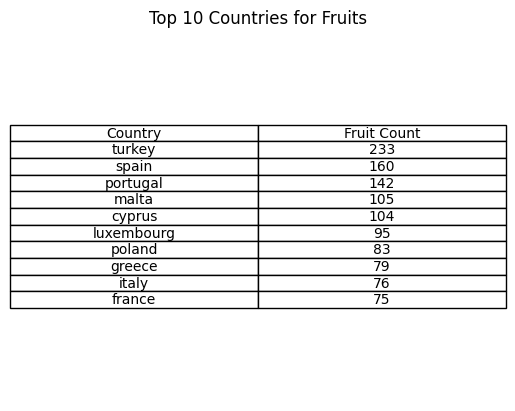

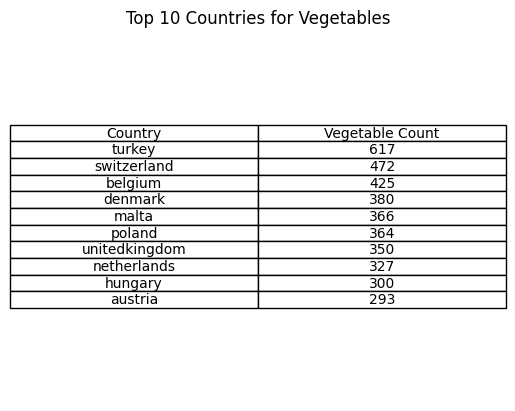

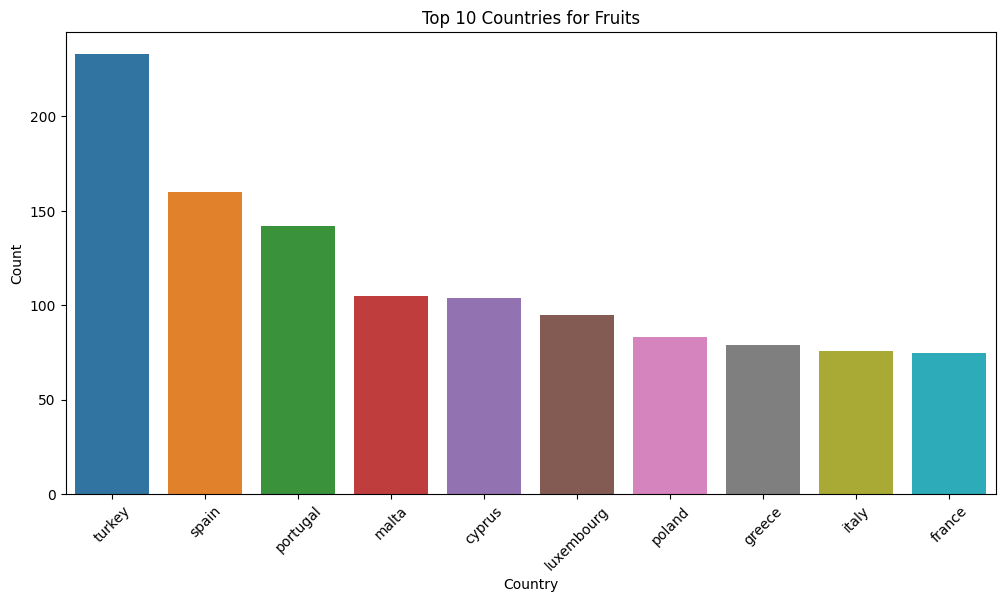

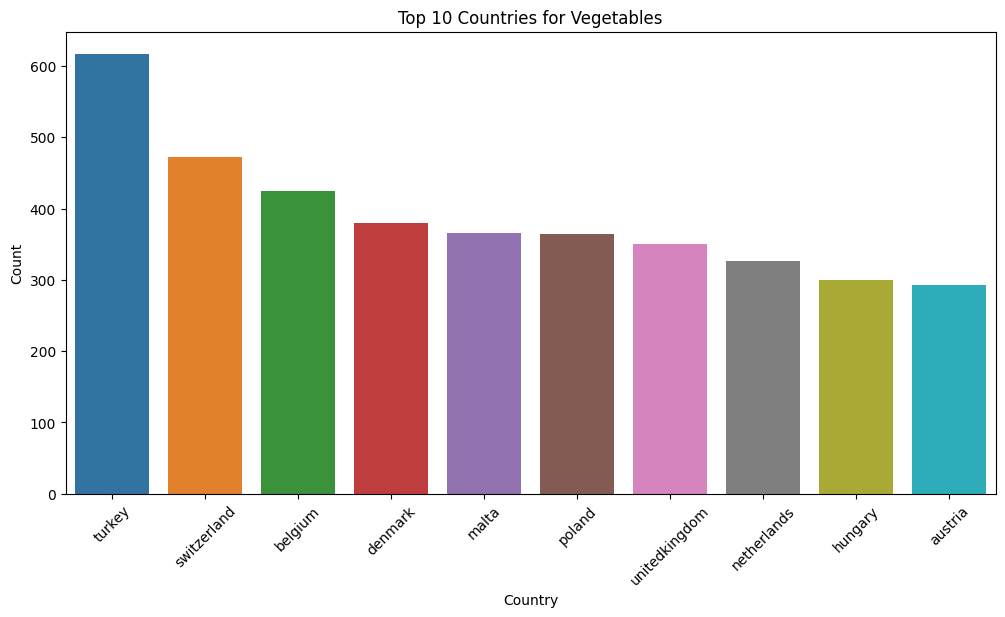

In [33]:
import pandas as pd

# Load data
fruits_df = pd.read_csv("fruits_data.csv")
vegetables_df = pd.read_csv("vegetables_data.csv")

# Calculate top 10 countries for fruits
fruits_top_countries = fruits_df['country'].value_counts().head(10).reset_index()
fruits_top_countries.columns = ['Country', 'Fruit Count']

# Calculate top 10 countries for vegetables
vegetables_top_countries = vegetables_df['country'].value_counts().head(10).reset_index()
vegetables_top_countries.columns = ['Country', 'Vegetable Count']

# Display results in a table for fruits
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=fruits_top_countries.values, colLabels=fruits_top_countries.columns, cellLoc='center', loc='center')
plt.title('Top 10 Countries for Fruits')
plt.show()

# Display results in a table for vegetables
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=vegetables_top_countries.values, colLabels=vegetables_top_countries.columns, cellLoc='center', loc='center')
plt.title('Top 10 Countries for Vegetables')
plt.show()

# Visualization: Top 10 countries for fruits
plt.figure(figsize=(12, 6))
sns.barplot(x=fruits_top_countries['Country'], y=fruits_top_countries['Fruit Count'])
plt.title('Top 10 Countries for Fruits')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualization: Top 10 countries for vegetables
plt.figure(figsize=(12, 6))
sns.barplot(x=vegetables_top_countries['Country'], y=vegetables_top_countries['Vegetable Count'])
plt.title('Top 10 Countries for Vegetables')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Bar plots highlight the top 10 countries producing fruits and vegetables, showing 'Turkey' as a leading producer.

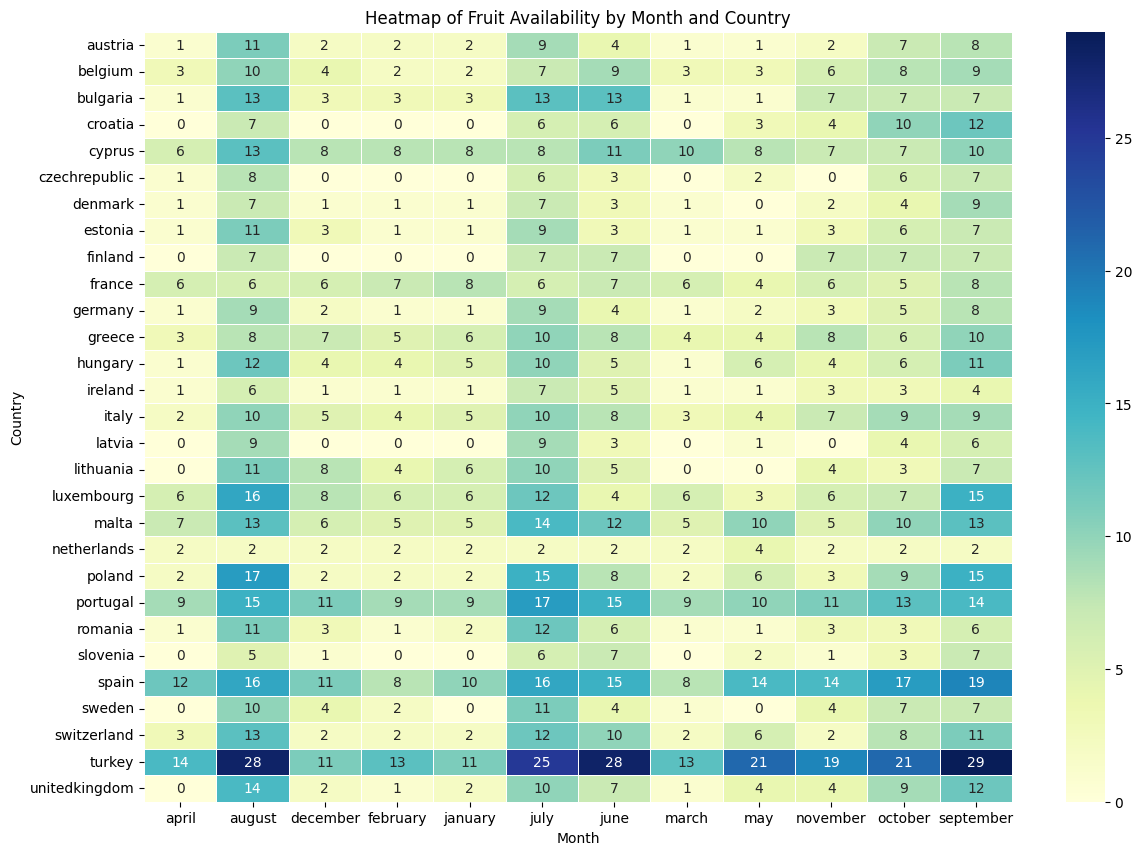

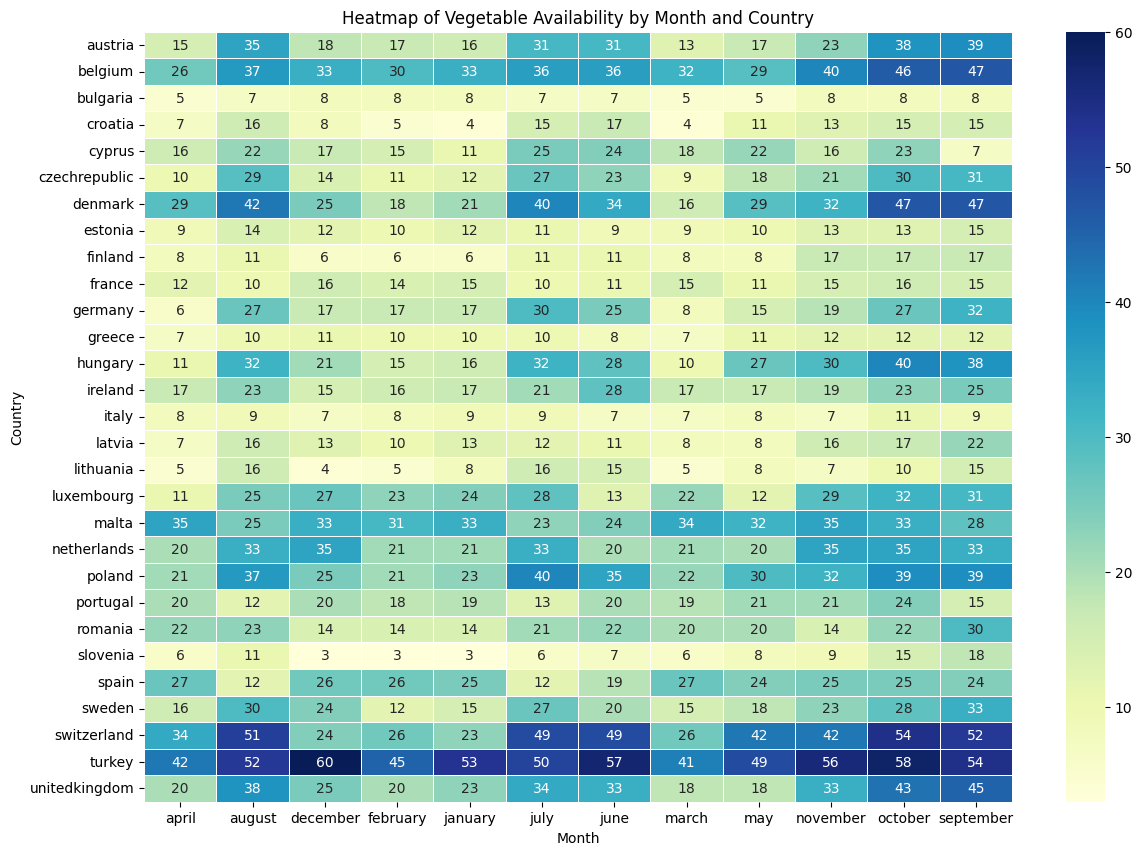

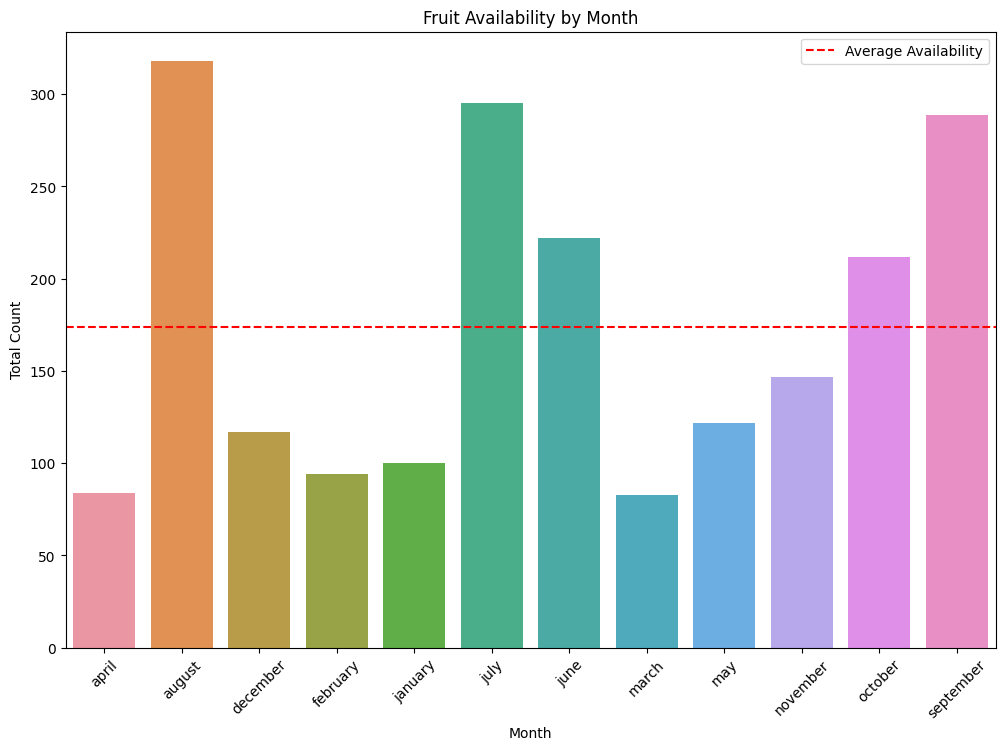

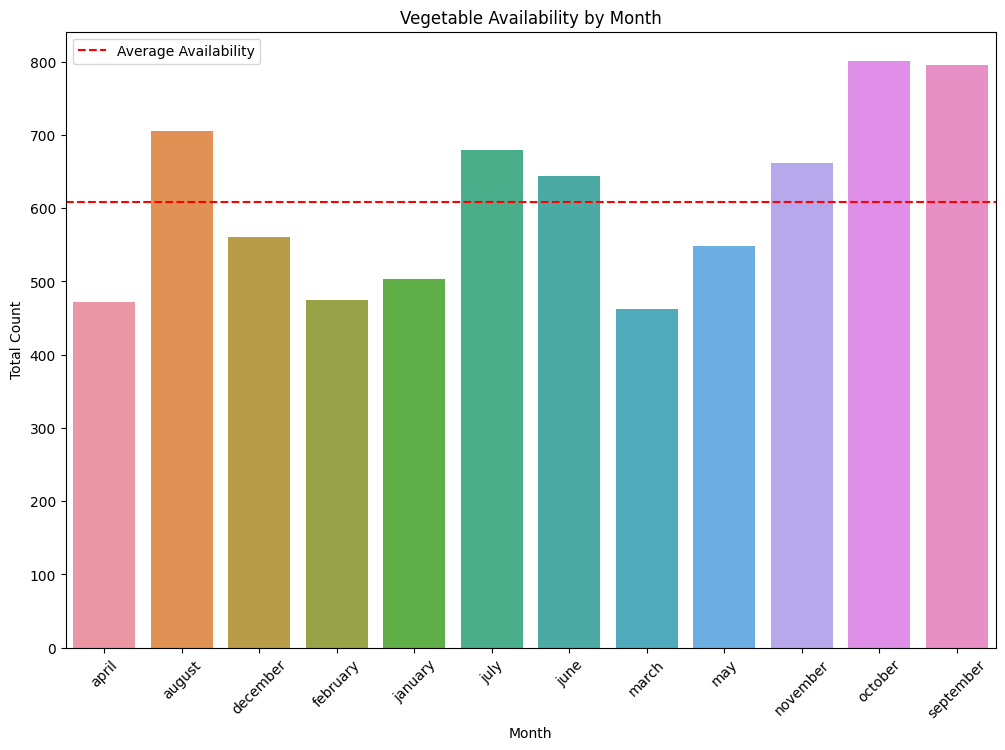

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
fruits_df = pd.read_csv("fruits_data.csv")
vegetables_df = pd.read_csv("vegetables_data.csv")

# Create pivot tables to organize the data for heatmap visualization.
fruits_heatmap_data = fruits_df.pivot_table(index='country', columns='month', values='name', aggfunc='size', fill_value=0)
vegetables_heatmap_data = vegetables_df.pivot_table(index='country', columns='month', values='name', aggfunc='size', fill_value=0)

# Visualize the heatmap for fruits
plt.figure(figsize=(14, 10))
sns.heatmap(fruits_heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Fruit Availability by Month and Country')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()

# Visualize the heatmap for vegetables
plt.figure(figsize=(14, 10))
sns.heatmap(vegetables_heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Vegetable Availability by Month and Country')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()

# Identify months with maximum availability for fruits
availability_by_month_fruits = fruits_heatmap_data.sum(axis=0)
top_months_fruits = availability_by_month_fruits.nlargest(5).index.tolist()

# Visualize the months with maximum availability for fruits
plt.figure(figsize=(12, 8))
sns.barplot(x=availability_by_month_fruits.index, y=availability_by_month_fruits.values)
plt.title('Fruit Availability by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.axhline(availability_by_month_fruits.mean(), color='red', linestyle='--', label='Average Availability')
plt.legend()
plt.show()

# Identify months with maximum availability for vegetables
availability_by_month_vegetables = vegetables_heatmap_data.sum(axis=0)
top_months_vegetables = availability_by_month_vegetables.nlargest(5).index.tolist()

# Visualize the months with maximum availability for vegetables
plt.figure(figsize=(12, 8))
sns.barplot(x=availability_by_month_vegetables.index, y=availability_by_month_vegetables.values)
plt.title('Vegetable Availability by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.axhline(availability_by_month_vegetables.mean(), color='red', linestyle='--', label='Average Availability')
plt.legend()
plt.show()


We can observe that in august / july / september / june / october  are the maximum availabilityfor fruit

We can observe that for vegetables the month with the maximum availability are october / september / august / june / july / november

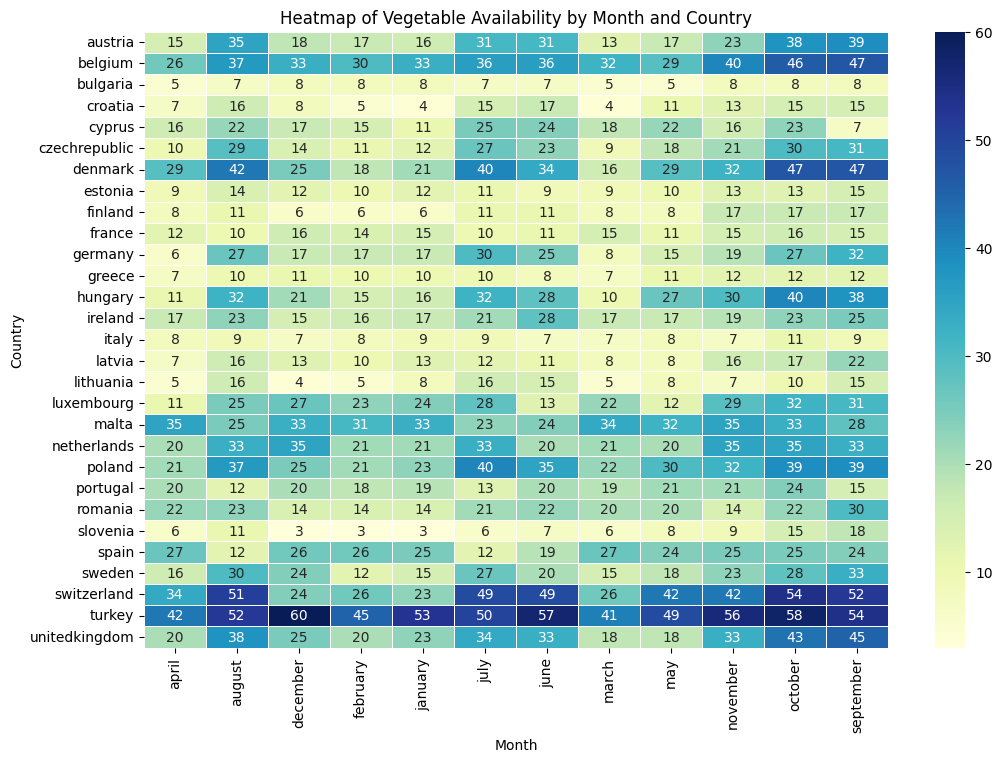

Months considered as outliers based on availability: []


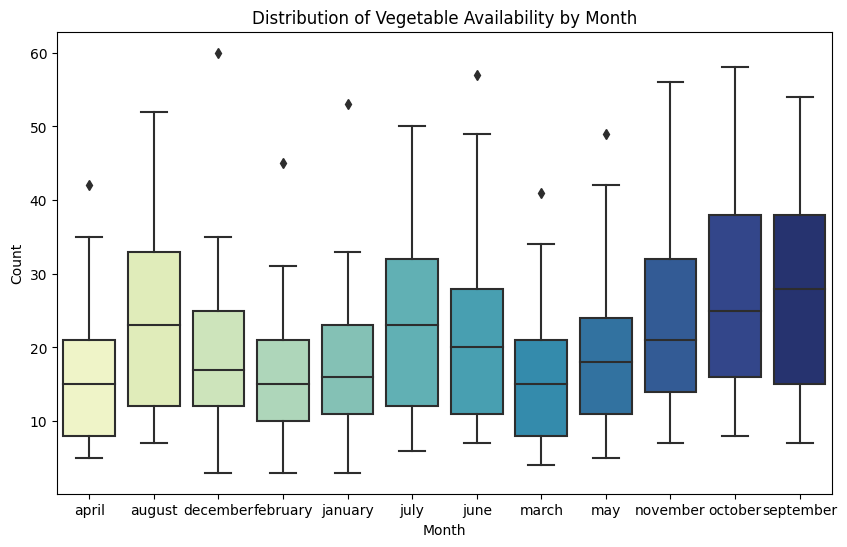

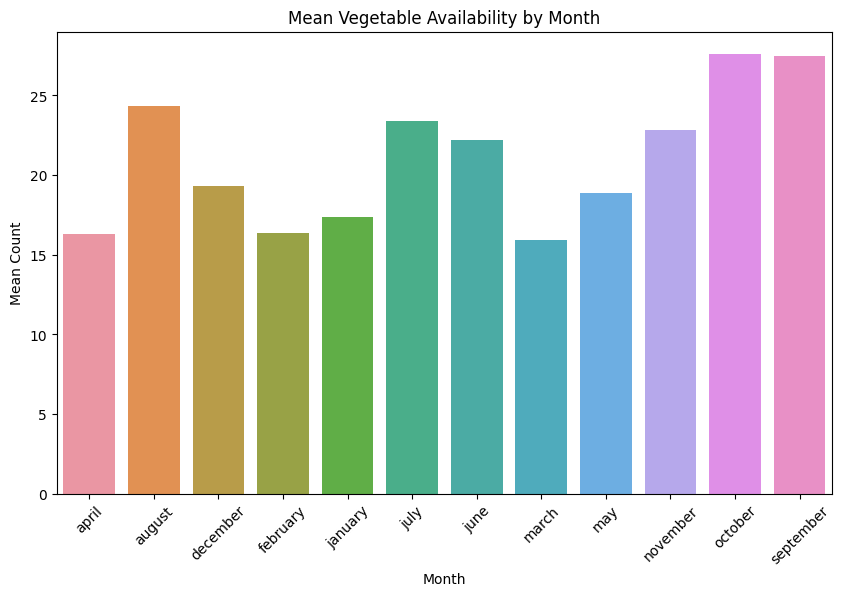

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data load
vegetables_df = pd.read_csv("vegetables_data.csv")

# Pivot table to create heatmap data
heatmap_data_veg = vegetables_df.pivot_table(index='country', columns='month', values=None, aggfunc='size', fill_value=0)

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_veg, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Vegetable Availability by Month and Country')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()

# Calculate mean availability across months
mean_availability_veg = heatmap_data_veg.mean()

# Identify outliers (months with availability significantly higher or lower than the mean)
outliers_veg = heatmap_data_veg.columns[(heatmap_data_veg.mean() > heatmap_data_veg.mean().mean() + 2 * heatmap_data_veg.std()) | (heatmap_data_veg.mean() < heatmap_data_veg.mean().mean() - 2 * heatmap_data_veg.std())]

print(f"Months considered as outliers based on availability: {outliers_veg.tolist()}")

# Visualize distribution of availability across months
plt.figure(figsize=(10, 6))
sns.boxplot(data=heatmap_data_veg, palette='YlGnBu')
plt.title('Distribution of Vegetable Availability by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Visualize mean availability by month
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_availability_veg.index, y=mean_availability_veg.values)
plt.title('Mean Vegetable Availability by Month')
plt.xlabel('Month')
plt.ylabel('Mean Count')
plt.xticks(rotation=45)
plt.show()


Countries flagged as outliers:
country
spain    -1
turkey   -1
dtype: int32


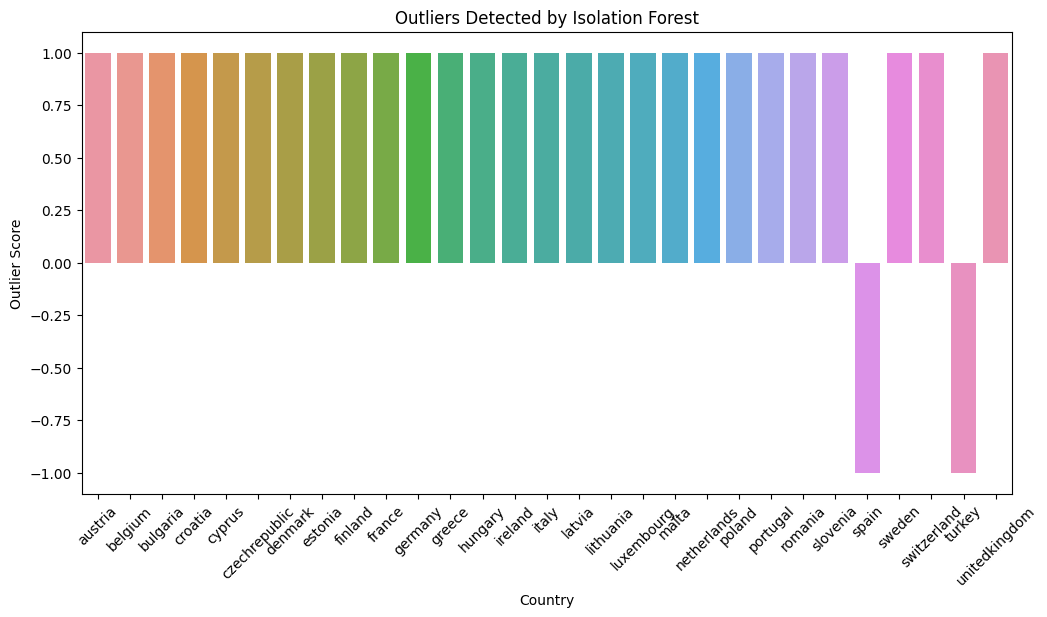

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Data preparation 
fruits_df = pd.read_csv("fruits_data.csv")

# Pivot table to create heatmap data
heatmap_data = fruits_df.pivot_table(index='country', columns='month', values=None, aggfunc='size', fill_value=0)

# Initialize Isolation Forest model
clf = IsolationForest(contamination=0.05)  # Adjust contamination parameter as needed

# Fit model and predict outliers
outliers = clf.fit_predict(heatmap_data.values)

# Convert outliers array to Series for easier manipulation
outliers_series = pd.Series(outliers, index=heatmap_data.index)

# Print countries flagged as outliers (score = -1)
print("Countries flagged as outliers:")
print(outliers_series[outliers_series == -1])

# Visualize outlier scores
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_series.index, y=outliers_series.values)
plt.title('Outliers Detected by Isolation Forest')
plt.xlabel('Country')
plt.ylabel('Outlier Score')
plt.xticks(rotation=45)
plt.show()


It looks like the Isolation Forest algorithm has identified Spain and Turkey as outliers based on the fruit availability data. This means that these countries exhibit patterns of fruit availability that significantly differ from the majority of other countries.
Interpretation and Insights:

Outlier Identification:
Spain and Turkey have been flagged with an outlier score of -1, indicating that their fruit availability patterns are distinct from the norm observed across other countries in the dataset.

Potential Reasons for Outlier Status:

Climate Variability: Differences in climate conditions between Spain, Turkey, and other countries could lead to unique fruit availability patterns.
Agricultural Practices: Varied agricultural practices or crop cycles specific to these regions may contribute to the outlier status.
Data Anomalies: Consider verifying data accuracy and completeness for these countries to ensure that outlier status is not due to data irregularities.

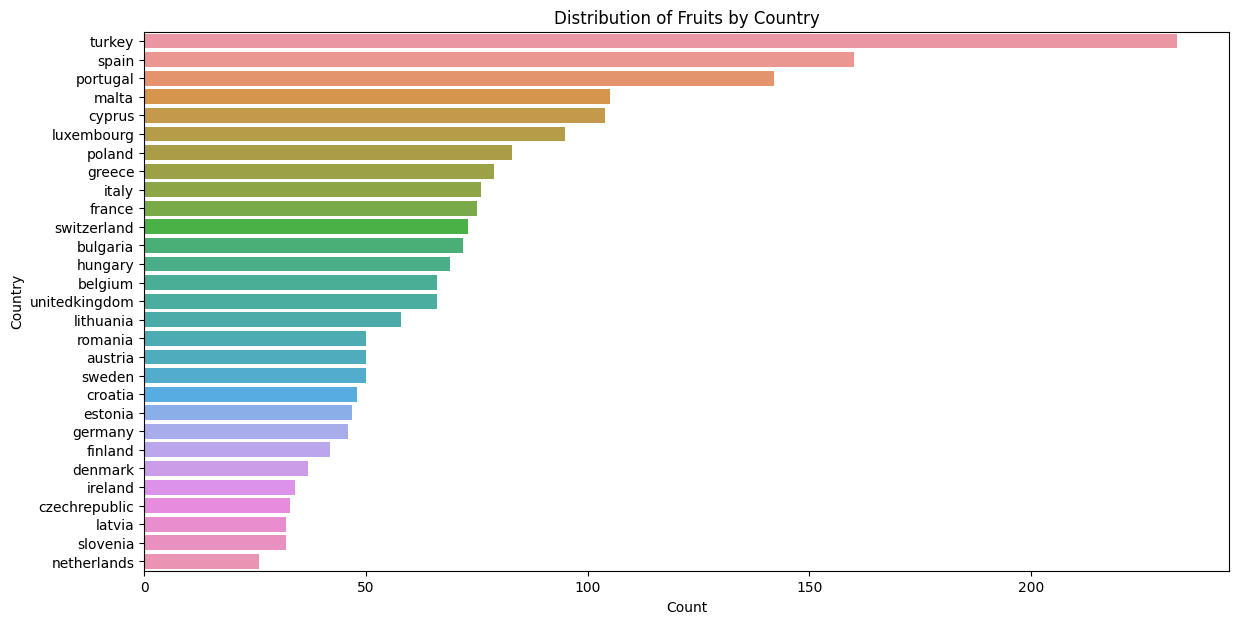

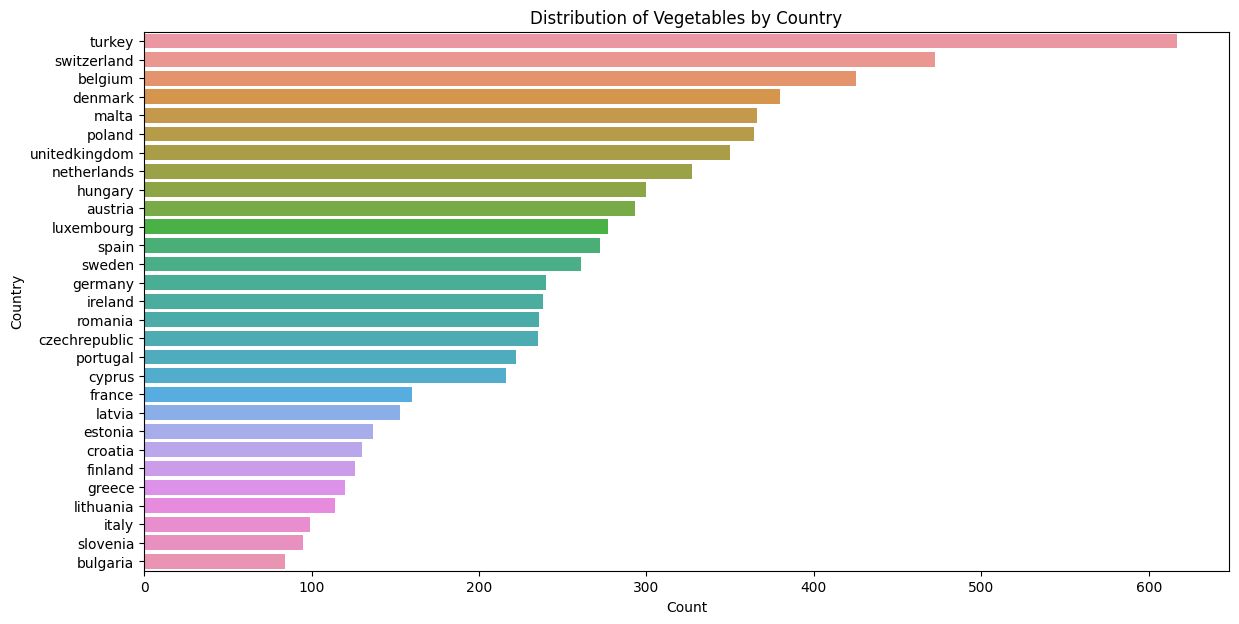

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data preparation (replace with your actual data loading)
# Assume fruits_df and vegetables_df are loaded from CSV or another source
fruits_df = pd.read_csv("fruits_data.csv")
vegetables_df = pd.read_csv("vegetables_data.csv")

# Distribution of Fruits by Country
plt.figure(figsize=(14, 7))
sns.countplot(y=fruits_df['country'], order=fruits_df['country'].value_counts().index)
plt.title('Distribution of Fruits by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Distribution of Vegetables by Country
plt.figure(figsize=(14, 7))
sns.countplot(y=vegetables_df['country'], order=vegetables_df['country'].value_counts().index)
plt.title('Distribution of Vegetables by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()



In [10]:
import pandas as pd

# Load fruits and vegetables data
fruits_df = pd.read_csv('fruits_data.csv')
vegetables_df = pd.read_csv('vegetables_data.csv')

# Merge fruits and vegetables data with suffixes to distinguish names
seasonal_df = pd.merge(fruits_df, vegetables_df, on=['country', 'month'], how='outer', suffixes=('_fruit', '_vegetable'))

# Rename the columns for clarity
seasonal_df = seasonal_df.rename(columns={'name_fruit': 'Fruits', 'name_vegetable': 'Vegetables', 'country': 'Country', 'month': 'Month'})

# Save the resulting DataFrame to a CSV file
seasonal_df.to_csv('seasonal_fruits_vegetables.csv', index=False)

display (seasonal_df)


,Fruits,Month,Country,Vegetables
0,apple,august,denmark,beech hat mushroom
1,apple,august,denmark,beetroot
2,apple,august,denmark,bell pepper
3,apple,august,denmark,broccoli
4,apple,august,denmark,cabbage
...,...,...,...,...
54435,NaN,february,croatia,pumpkin (stored)
54436,NaN,march,croatia,carrot (stored)
54437,NaN,march,croatia,lettuce
54438,NaN,march,croatia,onion (stored)
